### Neural Network Training - Complete Dataset
This notebook can be ran if one wishes to train again the Neural Networks used for the complete analysis. This is not recommended due to the computational costs involved. The notebook loads the necessary data for training and scales it accordingly. One neural network is trained for each Wilson coefficient (linear and quadratic). The new model weights can be saved by setting the parameter `save` to `True` in the `train_test_model` function, and by specifying a destination folder to store them. The training and test losses are stored in a list so they can be plotted. At the end of training it is possible to compute the minimum losses for each neural network.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import torch
import torch.optim as optim
from torch import nn
from utils.funcs import complete_data_preprocessing, dataset_loader, MLP,  train_test_model

warnings.filterwarnings('ignore')


In [2]:
palette = sns.color_palette('Set2')
sns.set_palette(palette)
plt.rcParams['text.usetex'] = False
p = {'size': 17, 'family': 'cmr10'}


In [3]:
np.random.seed(0)

In [4]:
LUMINOSITY = 300

In [2]:
data = pd.read_json('../data/data.json')
sm = pd.read_json('../data/MonteCarlo/SM.json')
c8dt = pd.read_json('../data/MonteCarlo/c8dt.json')
c8dt2 = pd.read_json('../data/MonteCarlo/c8dt2.json')
c8qt= pd.read_json('../data/MonteCarlo/c8qt.json')
c8qt2 = pd.read_json('../data/MonteCarlo/c8qt2.json')

In [3]:
totXSSM = sum(sm['weights'])
totXSc8qt = sum(c8qt['weights'])
totXSc8qt2 = sum(c8qt2['weights'])
totXSc8dt = sum(c8dt['weights'])
totXSc8dt2 = sum(c8dt2['weights'])

In [5]:
features = ['ptl+', 'ptl-', 'etal+', 'etal-', 'ptll', 'mll',
'deltaPhill', 'deltaEtall', 'ptb_lead', 'ptb_trail', 'ptbb', 'mbb',
'ST', 'MET']

In [6]:
Xc8dt, Xc8dt_sm, Xsm, Xdata, y = complete_data_preprocessing(c8dt, sm, data, features)
Xc8qt, Xc8qt_sm, _, _, _ = complete_data_preprocessing(c8qt, sm, data, features)
Xc8qt2, Xc8qt2_sm, _, _, _ = complete_data_preprocessing(c8qt2, sm, data, features)
Xc8dt2, Xc8dt2_sm, _, _, _ = complete_data_preprocessing(c8dt2, sm, data, features)

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
#parameters common to all models
test_size = 0.2
random_state = 42
batch_size = 200000

#split all datasets into train and test
train_c8dt, test_c8dt = dataset_loader(Xc8qt_sm.to_numpy(), y, test_size, random_state, batch_size, device)
train_c8qt, test_c8qt = dataset_loader(Xc8qt_sm.to_numpy(), y, test_size, random_state, batch_size, device)
train_c8qt2, test_c8qt2 = dataset_loader(Xc8qt2_sm.to_numpy(), y, test_size, random_state, batch_size, device)
train_c8dt2, test_c8dt2 = dataset_loader(Xc8dt2_sm.to_numpy(), y, test_size, random_state, batch_size, device)

In [11]:
#call the classifier with the correct input size
model_c8dt = MLP(input_size=14).to(device)
model_c8qt = MLP(input_size=14).to(device)
model_c8qt2 = MLP(input_size=14).to(device)
model_c8dt2 = MLP(input_size=14).to(device)

In [12]:
criterion = nn.BCELoss() #common for all models

#specify optimiser hyperparameters
optim_c8dt = optim.Adam(model_c8dt.parameters(), lr=0.0003)
optim_c8dt2 = optim.Adam(model_c8dt2.parameters(), lr=0.0001)
optim_c8qt = optim.Adam(model_c8qt.parameters(), lr=0.0001)
optim_c8qt2 = optim.Adam(model_c8qt2.parameters(), lr=0.0005)

In [ ]:
train_loss_c8dt, test_loss_c8dt = train_test_model(model_c8dt, criterion, optim_c8dt, train_c8dt, test_c8dt, epochs=400, save = False)

In [ ]:
min_loss_c8dt = min(train_loss_c8dt) 
min_loss_index_c8dt = train_loss_c8dt.index(min_loss_c8dt)

plt.figure(figsize=(10, 6))
plt.plot(train_loss_c8dt, linewidth=2, label = 'Train loss')
plt.plot(test_loss_c8dt, linewidth=2 , label = 'Test loss')
plt.scatter(min_loss_index_c8dt, min_loss_c8dt, color='red', label=f'Minimum = {min_loss_c8dt:.3f}')
plt.xlabel('Epoch', fontdict=p)
plt.ylabel('BCE Loss', fontdict=p)
plt.legend(prop = p, loc='upper right')
plt.title('Loss per epoch (complete analysis) \nSM vs $c^{(8)}_{dt}$', fontdict=p)
plt.xticks(**p)
plt.yticks(**p)
#plt.savefig('../plots/Loss_c8dt_FULL.pdf')
plt.show()

In [ ]:
train_loss_c8qt, test_loss_c8qt = train_test_model(model_c8qt, criterion, optim_c8qt, train_c8qt, test_c8qt, epochs=400, save = False)

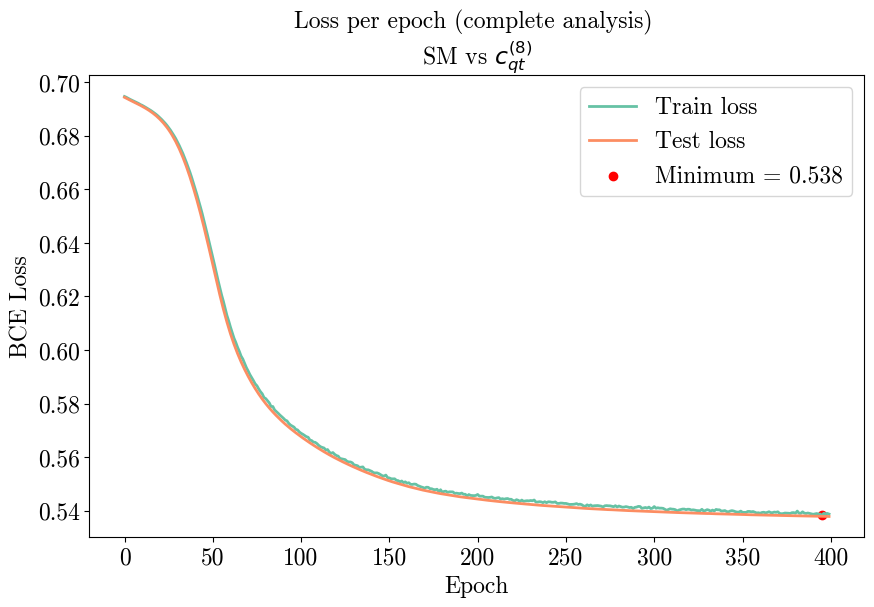

In [47]:
min_loss_c8qt = min(train_loss_c8qt) 
min_loss_index_c8qt = train_loss_c8qt.index(min_loss_c8qt)

plt.figure(figsize=(10, 6))
plt.plot(train_loss_c8qt, linewidth=2, label = 'Train loss')
plt.plot(test_loss_c8qt, linewidth=2 , label = 'Test loss')
plt.scatter(min_loss_index_c8qt, min_loss_c8qt, color='red', label=f'Minimum = {min_loss_c8qt:.3f}')
plt.xlabel('Epoch', fontdict=p)
plt.ylabel('BCE Loss', fontdict=p)
plt.legend(prop = p, loc='upper right')
plt.title('Loss per epoch (complete analysis) \nSM vs $c^{(8)}_{qt}$', fontdict=p)
plt.xticks(**p)
plt.yticks(**p)
#plt.savefig('../plots/Loss_c8qt_FULL.pdf')
plt.show()

In [ ]:
train_loss_c8dt2, test_loss_c8dt2 = train_test_model(model_c8dt2, criterion, optim_c8dt2, train_c8dt2, test_c8dt2, epochs=400, save = False)

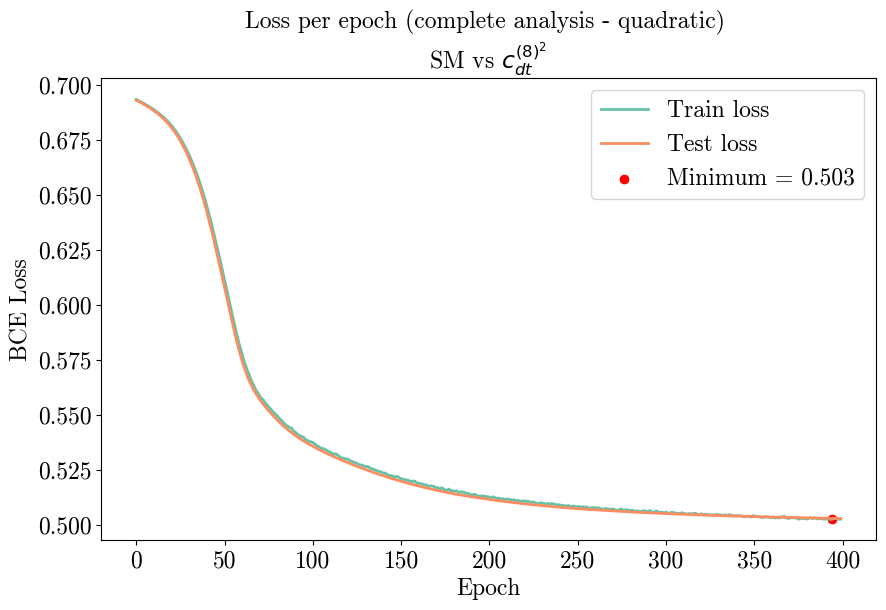

In [50]:
min_loss_c8dt2 = min(train_loss_c8dt2) 
min_loss_index_c8dt2 = train_loss_c8dt2.index(min_loss_c8dt2)

plt.figure(figsize=(10, 6))
plt.plot(train_loss_c8dt2, linewidth=2, label = 'Train loss')
plt.plot(test_loss_c8dt2, linewidth=2 , label = 'Test loss')
plt.scatter(min_loss_index_c8dt2, min_loss_c8dt2, color='red', label=f'Minimum = {min_loss_c8dt2:.3f}')
plt.xlabel('Epoch', fontdict=p)
plt.ylabel('BCE Loss', fontdict=p)
plt.legend(prop = p, loc='upper right')
plt.title('Loss per epoch (complete analysis - quadratic) \nSM vs $c^{(8)^2}_{dt}$', fontdict=p)
plt.xticks(**p)
plt.yticks(**p)
#plt.savefig('../plots/Loss_c8dt2_FULL.pdf')
plt.show()

In [ ]:
train_loss_c8qt2, test_loss_c8qt2 = train_test_model(model_c8qt2, criterion, optim_c8qt2, train_c8qt2, test_c8qt2, epochs=400, save = False)

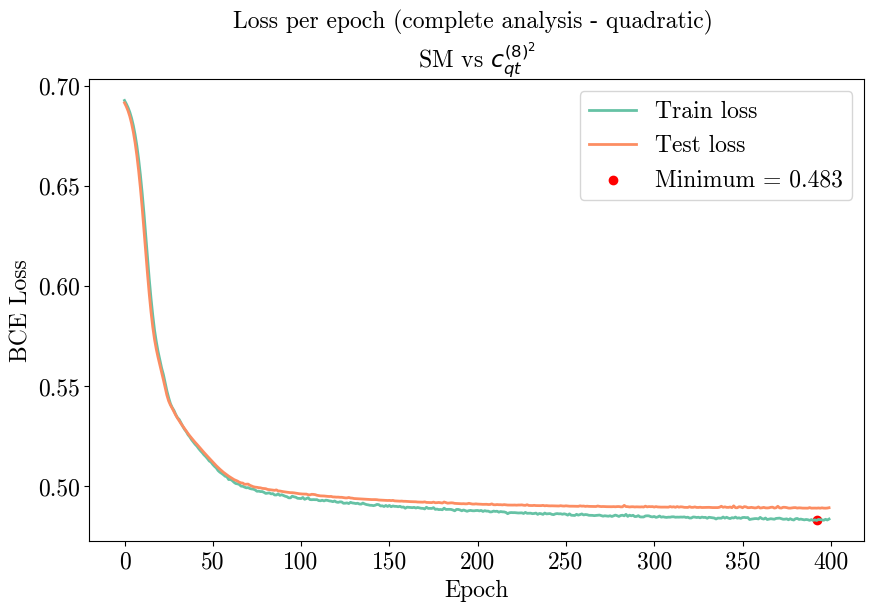

In [53]:
min_loss_c8qt2 = min(train_loss_c8qt2) 
min_loss_index_c8qt2 = train_loss_c8qt2.index(min_loss_c8qt2)

plt.figure(figsize=(10, 6))
plt.plot(train_loss_c8qt2, linewidth=2, label = 'Train loss')
plt.plot(test_loss_c8qt2, linewidth=2 , label = 'Test loss')
plt.scatter(min_loss_index_c8qt2, min_loss_c8qt2, color='red', label=f'Minimum = {min_loss_c8qt2:.3f}')
plt.xlabel('Epoch', fontdict=p)
plt.ylabel('BCE Loss', fontdict=p)
plt.legend(prop = p, loc='upper right')
plt.title('Loss per epoch (complete analysis - quadratic) \nSM vs $c^{(8)^2}_{qt}$', fontdict=p)
plt.xticks(**p)
plt.yticks(**p)
#plt.savefig('../plots/Loss_c8qt2_FULL.pdf')
plt.show()

In [ ]:
print(f"""Train losses
-----------------------
Minimum loss c8dt: {min_loss_c8dt:.3f} at epoch {min_loss_index_c8dt}
Minimum loss c8qt: {min_loss_c8qt:.3f} at epoch {min_loss_index_c8qt}
Minimum loss (quadratic) c8dt2: {min_loss_c8dt2:.3f} at epoch {min_loss_index_c8dt2}
Minimum loss (quadratic) c8qt2: {min_loss_c8qt2:.3f} at epoch {min_loss_index_c8qt2}""")